In [ ]:
import os
import cv2
import numpy as np
import keras
import glob
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
from google.colab import files
from keras import regularizers
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from google.colab import drive
from sklearn.utils import shuffle
from keras import utils as np_utils


In [ ]:
import time
import pytz
from datetime import datetime 

UTC = pytz.utc
timeJKT = pytz.timezone('Asia/Jakarta') 
start_time = datetime.now(timeJKT).replace(microsecond=0)

# Augmentation Section

## Load Raw Image

In [ ]:
!rm -rf './temp'
!rm -rf './resize'
!rm -rf './brightness'
!rm -rf './translate'
!rm -rf './zoom'
!rm -rf './rotate'
!rm -rf './Data'
!rm -rf './NewData'
!rm -rf './myModel.h5'
!rm -rf './Model_Code_C.tflite'

In [ ]:
import cv2
import os
import imutils
from google.colab import drive
from google.colab import files
from PIL import Image, ImageEnhance

os.mkdir('./Data')
drive.mount('/content/drive')
datasets_dir = "/content/drive/My Drive/TugasAkhir/All Data"

Mounted at /content/drive


## Augmentation Data 
(Brightness | Resize | Translate | Zoom | Rotate)

In [ ]:
  all_augmented_images = []
  final_size = 64,64

  for folder in sorted(os.listdir("%s"%datasets_dir)):
    print("Start with folder %s (with %d raw image)"%(folder,len(os.listdir(datasets_dir+'/'+folder))))
    os.chdir('./Data')
    os.mkdir("./%s"%folder)
    os.chdir('..')

    sort_number = 1
    totaldata = 0
    for image_data in sorted(os.listdir("%s/%s"%(datasets_dir,folder))):
      # folder = image_data[0:1]
      os.mkdir('./resize')
      os.mkdir('./brightness')
      os.mkdir('./translate')
      os.mkdir('./zoom')
      os.mkdir('./rotate')

      # print("============================================================================================================================================")
      print("  Begin : ",end="")
      size_img = 256,256
      original = cv2.imread("%s/%s/%s"%(datasets_dir,folder,image_data))
      original = cv2.resize(original, size_img)
      cv2.imwrite(os.path.join("./resize/original.jpg"), original)

      print("Resize", end=" | ") 
      # print("============================================================================================================================================")
      original = Image.open("./resize/original.jpg")
      enhancer_original = ImageEnhance.Brightness(original)

      factor = 0.75 #darkens the image
      im_output_original = enhancer_original.enhance(factor)
      im_output_original.save("./brightness/%s_brightness_original_075.jpg"%folder)

      factor = 1.00 #darkens the image
      im_output_original = enhancer_original.enhance(factor)
      im_output_original.save("./brightness/%s_brightness_original_100.jpg"%folder)

      factor = 1.25 #brightens the image
      im_output_original = enhancer_original.enhance(factor)
      im_output_original.save("./brightness/%s_brightness_original_125.jpg"%folder)

      factor = 1.5 #brightens the image
      im_output_original = enhancer_original.enhance(factor)
      im_output_original.save("./brightness/%s_brightness_original_150.jpg"%folder)

      print("Brightness",end=" | ") 
      # print("============================================================================================================================================")
      original = cv2.imread("./resize/original.jpg")
      size_img = 256,256

      scaling = 16
      height_update = -16
      for translate_x in range(1,6):
        width_update = -16
        for translate_y in range(1,6):
          T = np.float32([[1, 0, width_update], [0, 1, height_update]]) 
          translate = cv2.warpAffine(original, T, (256, 256))
          translate = translate[0+scaling:256-scaling, 0+scaling:256-scaling]
          translate = cv2.resize(translate, size_img)
          cv2.imwrite(os.path.join("./translate/%s_translate_original_%d-%d.jpg"%(folder,translate_x,translate_y)), translate)
          width_update +=8
        height_update +=8

      for image_data in sorted(os.listdir("./brightness/")):
        brightness = cv2.imread("./brightness/" + image_data)
        title = image_data[0:len(image_data)-4]
        scaling = 16
        height_update = -16
        for translate_x in range(1,6):
          width_update = -16
          for translate_y in range(1,6):
            T = np.float32([[1, 0, width_update], [0, 1, height_update]]) 
            translate = cv2.warpAffine(brightness, T, (256, 256))
            translate = translate[0+scaling:256-scaling, 0+scaling:256-scaling]
            translate = cv2.resize(translate, size_img)
            cv2.imwrite(os.path.join("./translate/%s_translate_brightness_%d-%d.jpg"%(title,translate_x,translate_y)), translate)
            width_update +=8
          height_update +=8
      
      print("Translate", end=" | ") 
      # print("============================================================================================================================================")
      original = cv2.imread("./resize/original.jpg")
      size_img = 256,256

      scaling = 12
      for j in range(1,4):
        zoom_crop = original[0+scaling:256-scaling, 0+scaling:256-scaling]
        zoom_crop = cv2.resize(zoom_crop, size_img)
        cv2.imwrite(os.path.join("./zoom/%s_zoom_original_%03d.jpg"%(folder,j)), zoom_crop)
        scaling+=12

      for image_data in sorted(os.listdir("./brightness/")):
        brightness = cv2.imread("./brightness/" + image_data)
        title = image_data[0:len(image_data)-4]
        scaling = 12
        for j in range(1,4):
          zoom_crop = brightness[0+scaling:256-scaling, 0+scaling:256-scaling]
          zoom_crop = cv2.resize(zoom_crop, size_img)
          cv2.imwrite(os.path.join("./zoom/%s_zoom_brightness_%03d.jpg"%(title,j)), zoom_crop)
          scaling+=12

      for image_data in sorted(os.listdir("./translate/")):
        translate = cv2.imread("./translate/" + image_data)
        title = image_data[0:len(image_data)-4]
        scaling = 12
        for j in range(1,4):
          zoom_crop = translate[0+scaling:256-scaling, 0+scaling:256-scaling]
          zoom_crop = cv2.resize(zoom_crop, size_img)
          cv2.imwrite(os.path.join("./zoom/%s_zoom_translate_%03d.jpg"%(title,j)), zoom_crop)
          scaling+=12
  
      print("Zoom", end=" | ") 
      # print("============================================================================================================================================")
      scaling = 12

      index = 1
      original = cv2.imread("./resize/original.jpg") 
      for i in range(-5,6):
        rotate = imutils.rotate(original, angle=10*i/10)
        rotate = rotate[0+scaling:256-scaling, 0+scaling:256-scaling]
        rotate = cv2.resize(rotate, size_img)
        cv2.imwrite(os.path.join("./rotate/%s_rotated_original_%03d.jpg"%(folder,index)), rotate)
        index+=1

      for image_data in sorted(os.listdir("./brightness/")):
        translate_img = cv2.imread("./brightness/" + image_data)
        title = image_data[0:len(image_data)-4]
        index = 1
        for i in range(-5,6):
          rotate = imutils.rotate(translate_img, angle=10*i/10)
          rotate = rotate[0+scaling:256-scaling, 0+scaling:256-scaling]
          rotate = cv2.resize(rotate, size_img)
          cv2.imwrite(os.path.join("./rotate/%s_rotated_brightness_%03d.jpg"%(title,index)), rotate)
          index+=1

      for image_data in sorted(os.listdir("./translate/")):
        translate_img = cv2.imread("./translate/" + image_data)
        title = image_data[0:len(image_data)-4]
        index = 1
        for i in range(-5,6):
          rotate = imutils.rotate(translate_img, angle=10*i/10)
          rotate = rotate[0+scaling:256-scaling, 0+scaling:256-scaling]
          rotate = cv2.resize(rotate, size_img)
          cv2.imwrite(os.path.join("./rotate/%s_rotated_translate_%03d.jpg"%(title,index)), rotate)
          index+=1

      for image_data in sorted(os.listdir("./zoom/")):
        zoom_img = cv2.imread("./zoom/" + image_data)
        title = image_data[0:len(image_data)-4]
        index = 1
        for i in range(-5,6):
          rotate = imutils.rotate(zoom_img, angle=10*i/10)
          rotate = rotate[0+scaling:256-scaling, 0+scaling:256-scaling]
          rotate = cv2.resize(rotate, size_img)
          cv2.imwrite(os.path.join("./rotate/%s_rotated_zoom_%03d.jpg"%(title,index)), rotate)
          index+=1

      print("Rotate", end=" | ") 
        # print("============================================================================================================================================")
      for image_data in sorted(os.listdir('./resize/')):
          temp_img = cv2.imread('./resize/'+image_data)
          temp_img = cv2.resize(temp_img, final_size)
          cv2.imwrite(os.path.join("./Data/%s/%s_augmented_%07d.jpg"%(folder,folder,sort_number)), temp_img)
          sort_number+=1
      print("( ", end="")
      print(len(os.listdir("./resize/")), end=", ")

      for image_data in sorted(os.listdir('./brightness/')):
          temp_img = cv2.imread('./brightness/'+image_data)
          temp_img = cv2.resize(temp_img, final_size)
          cv2.imwrite(os.path.join("./Data/%s/%s_augmented_%07d.jpg"%(folder,folder,sort_number)), temp_img)
          sort_number+=1
      print(len(os.listdir("./brightness/")), end=", ")

      for image_data in sorted(os.listdir('./translate/')):
          temp_img = cv2.imread('./translate/'+image_data)
          temp_img = cv2.resize(temp_img, final_size)
          cv2.imwrite(os.path.join("./Data/%s/%s_augmented_%07d.jpg"%(folder,folder,sort_number)), temp_img)
          sort_number+=1
      print(len(os.listdir("./translate/")), end=", ")

      for image_data in sorted(os.listdir('./zoom/')):
          temp_img = cv2.imread('./zoom/'+image_data)
          temp_img = cv2.resize(temp_img, final_size)
          cv2.imwrite(os.path.join("./Data/%s/%s_augmented_%07d.jpg"%(folder,folder,sort_number)), temp_img)
          sort_number+=1
      print(len(os.listdir("./zoom/")), end=", ")

      for image_data in sorted(os.listdir('./rotate/')):
          temp_img = cv2.imread('./rotate/'+image_data)
          temp_img = cv2.resize(temp_img, final_size)
          cv2.imwrite(os.path.join("./Data/%s/%s_augmented_%07d.jpg"%(folder,folder,sort_number)), temp_img)
          sort_number+=1
      print(len(os.listdir("./rotate/")), end=" )")
      print(">> Done")
  
      !rm -rf './resize'
      !rm -rf './brightness'
      !rm -rf './translate'
      !rm -rf './zoom'
      !rm -rf './rotate'

    print("Finishing augmented data. Please wait...")
    for image_data in sorted(os.listdir("./Data/%s"%folder)):
        temp_img = cv2.imread("./Data/%s/%s"%(folder,image_data))
        all_augmented_images.append(temp_img)
        totaldata+=1
        
    print("Done with %s"%folder)
    print("- Total augmented data in folder %s:"%folder,totaldata)
    print("============================================================================================================================================")

  print("Total augmented data:", len(all_augmented_images))
  all_augmented_images = []
  cv2.destroyAllWindows()

Start with folder A (with 12 raw image)
  Begin : Resize | Brightness | Translate | Zoom | Rotate | ( 1, 4, 125, 390, 5720 )>> Done
  Begin : Resize | Brightness | Translate | Zoom | Rotate | ( 1, 4, 125, 390, 5720 )>> Done
  Begin : Resize | Brightness | Translate | Zoom | Rotate | ( 1, 4, 125, 390, 5720 )>> Done
  Begin : Resize | Brightness | Translate | Zoom | Rotate | ( 1, 4, 125, 390, 5720 )>> Done
  Begin : Resize | Brightness | Translate | Zoom | Rotate | ( 1, 4, 125, 390, 5720 )>> Done
  Begin : Resize | Brightness | Translate | Zoom | Rotate | ( 1, 4, 125, 390, 5720 )>> Done
  Begin : Resize | Brightness | Translate | Zoom | Rotate | ( 1, 4, 125, 390, 5720 )>> Done
  Begin : Resize | Brightness | Translate | Zoom | Rotate | ( 1, 4, 125, 390, 5720 )>> Done
  Begin : Resize | Brightness | Translate | Zoom | Rotate | ( 1, 4, 125, 390, 5720 )>> Done
  Begin : Resize | Brightness | Translate | Zoom | Rotate | ( 1, 4, 125, 390, 5720 )>> Done
  Begin : Resize | Brightness | Translat

In [ ]:
augmentation_end = datetime.now(timeJKT).replace(microsecond=0)

In [ ]:
import zipfile

# os.mkdir('Data')
# with zipfile.ZipFile("Datasets.zip","r") as zip_ref:
#     zip_ref.extractall("./Data")

# Machine Learning Section

## Datasets

In [ ]:
base_dir = "./Data"

LABELS = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


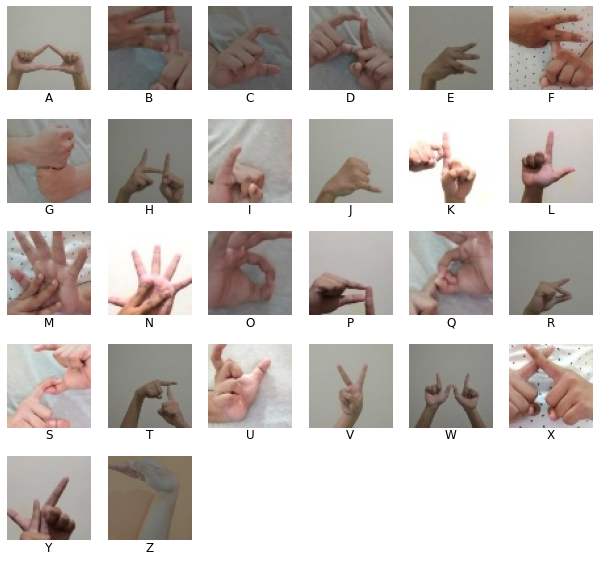

In [ ]:
sample_images = []

for folder in sorted(os.listdir(base_dir)):
  for image_inside in os.listdir(base_dir + "/" + folder):
    temporary_img = cv2.imread(base_dir + '/' + folder + '/' + image_inside)
    temporary_img = cv2.cvtColor(temporary_img, cv2.COLOR_BGR2RGB)
    sample_images.append(temporary_img)
    break

print("LABELS =",sorted(os.listdir(base_dir)))
row = 5
col = 6
fig = plt.figure(figsize = (col*1.75,row*2))
for load_samples in range(0,26):
    label = chr(load_samples+65)
    fig.add_subplot(row, col, load_samples+1)
    plt.axis('off')
    plt.imshow(sample_images[load_samples])
    plt.title(label, y=-0.2)


## Preprocessing

In [ ]:
pip install split-folders

In [ ]:
import splitfolders
!rm -rf './NewData'

splitfolders.ratio('Data', output="NewData", seed=42, ratio=(0.8, 0.1, 0.1)) 

Copying files: 1946880 files [36:53, 879.64 files/s] 


In [ ]:
train_dir      = "./NewData/train"
validation_dir = "./NewData/val"
test_dir       = "./NewData/test"

In [ ]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,
               'K':10,'L':11,'M':12,'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,
               'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,'Z':25}

def load_dataset():
    all_images = []
    all_labels = []
    dir_images = []
    print("LOADING DATA FROM : ",end = "")
    for folder in sorted(os.listdir(test_dir)):
        print(folder, end = ' | ')
        for image_data in os.listdir(test_dir + "/" + folder):
            temp_img = cv2.imread(test_dir + '/' + folder + '/' + image_data)
            temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
            all_images.append(temp_img)
            all_labels.append(labels_dict[folder])
            dir_images.append("%s/%s"%(chr(labels_dict[folder]+65), image_data))
    
    all_images = np.array(all_images)
    all_images = all_images.astype('float32')/255.0
    all_labels = keras.utils.np_utils.to_categorical(all_labels)
    print('\nLoaded', len(all_images),'images for testing,','Test data shape =',all_images.shape)

    return all_images, all_labels, dir_images

In [ ]:
test_images, test_labels, dir_images = load_dataset()

LOADING DATA FROM : A | B | C | D | E | F | G | H | I | J | K | L | M | N | O | P | Q | R | S | T | U | V | W | X | Y | Z | 
Loaded 194688 images for testing, Test data shape = (194688, 64, 64, 3)


In [ ]:
yhat_test = np.argmax(test_labels, axis=-1)
unique, counts = np.unique(yhat_test, return_counts=True)

print("Total data of Test data in each folder")
print('   | '.join([chr(alphabet) for alphabet in range(65,91)]))
print('| '.join(["%02d"%total for total in counts]))

Total data of Test data in each folder
A   | B   | C   | D   | E   | F   | G   | H   | I   | J   | K   | L   | M   | N   | O   | P   | Q   | R   | S   | T   | U   | V   | W   | X   | Y   | Z
7488| 7488| 7488| 7488| 7488| 7488| 7488| 7488| 7488| 7488| 7488| 7488| 7488| 7488| 7488| 7488| 7488| 7488| 7488| 7488| 7488| 7488| 7488| 7488| 7488| 7488


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from numpy import random

def blur(img_to_blur):
  option = [0,1,3]
  kernel = random.choice(option)
  if kernel != 0:
    img_blur = cv2.blur(img_to_blur,(kernel,kernel))
  else:
    img_blur = img_to_blur
  return (img_blur)

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    preprocessing_function=blur,
                    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    preprocessing_function=blur,
                    fill_mode = 'nearest')

In [ ]:
!rm -rf './train generator'
!rm -rf './val generator'

# os.mkdir('./train generator')
os.mkdir('./val generator')

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=64,
        seed=42,
        # save_to_dir="./train generator",
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=64,
        seed=42,
        save_to_dir="./val generator",
        class_mode='categorical')

Found 1557504 images belonging to 26 classes.
Found 194688 images belonging to 26 classes.


In [ ]:
import shutil
from IPython.display import clear_output 

# train_generator.next()
validation_generator.next()
clear_output()

# shutil.make_archive("Augmentation Train", 'zip', "./train generator")
shutil.make_archive("Augmentation Val", 'zip', "./val generator")

'/content/Augmentation Val.zip'

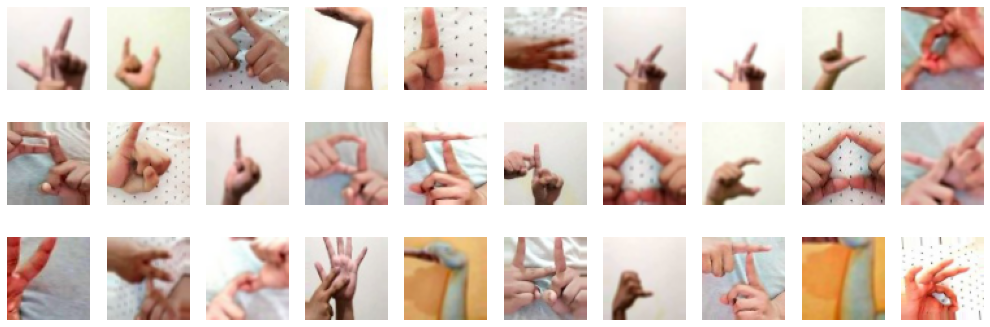

In [ ]:
sample_images = []

for number_of_sample in range(0,30):
  for image_inside in os.listdir("./val generator"):
    temporary_img = cv2.imread("./val generator/" + image_inside)
    temporary_img = cv2.cvtColor(temporary_img, cv2.COLOR_BGR2RGB)
    sample_images.append(temporary_img)

row = 3
col = 10
fig = plt.figure(figsize = (col*1.75,row*2))
for load_samples in range(0,30):
    fig.add_subplot(row, col, load_samples+1)
    plt.axis('off')
    plt.imshow(sample_images[load_samples])


## Create Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), padding = 'same', activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer = regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.RMSprop(), metrics=['accuracy'])

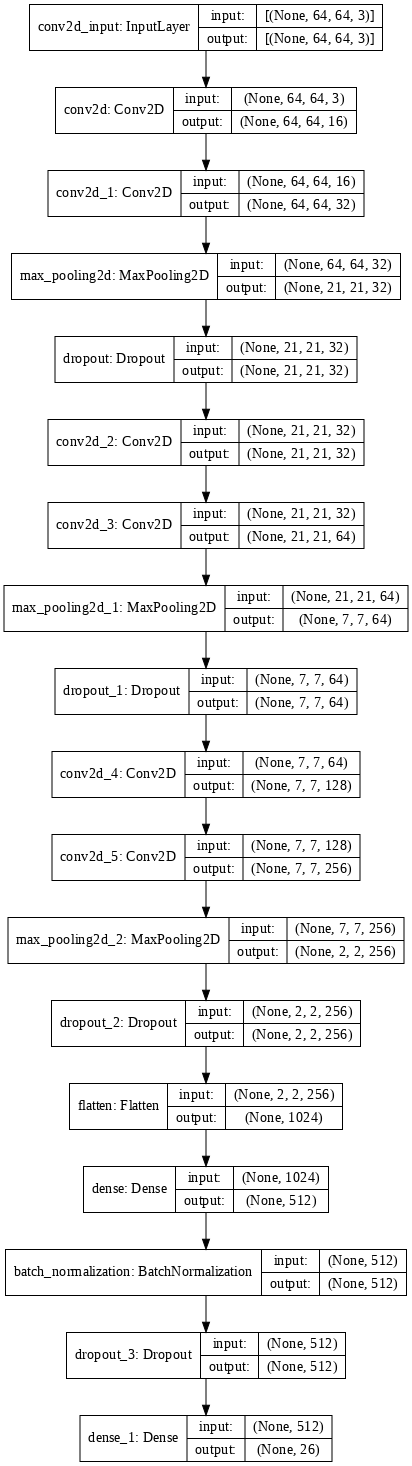

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, dpi=72)

Epoch 1/100
25/25 [==============================] - 26s 904ms/step - loss: 4.1475 - accuracy: 0.0403 - val_loss: 3.8207 - val_accuracy: 0.0469
Epoch 2/100
25/25 [==============================] - 20s 782ms/step - loss: 3.6686 - accuracy: 0.1005 - val_loss: 3.6544 - val_accuracy: 0.1750
Epoch 3/100
25/25 [==============================] - 19s 747ms/step - loss: 2.8210 - accuracy: 0.2808 - val_loss: 3.4286 - val_accuracy: 0.2937
Epoch 4/100
25/25 [==============================] - 19s 750ms/step - loss: 2.2144 - accuracy: 0.4178 - val_loss: 3.2451 - val_accuracy: 0.4516
Epoch 5/100
25/25 [==============================] - 19s 761ms/step - loss: 2.0021 - accuracy: 0.4747 - val_loss: 3.1052 - val_accuracy: 0.5422
Epoch 6/100
25/25 [==============================] - 19s 765ms/step - loss: 1.5676 - accuracy: 0.5936 - val_loss: 2.8752 - val_accuracy: 0.3953
Epoch 7/100
25/25 [==============================] - 19s 768ms/step - loss: 1.3918 - accuracy: 0.6653 - val_loss: 2.7320 - val_accuracy:

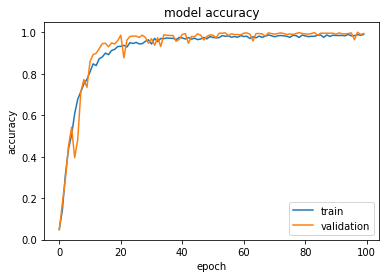

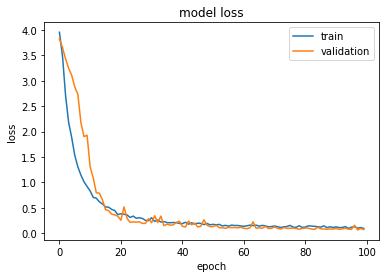

In [ ]:
from numpy.random import seed
seed(42)
import tensorflow as tf    
tf.random.set_seed(4312)

start_train = datetime.now(timeJKT)
history = model.fit(
      train_generator,
      validation_data=validation_generator,
      epochs=100,
      steps_per_epoch=25,
      validation_steps=10,
      verbose=1)
end_train = datetime.now(timeJKT)
train_time = end_train - start_train
print("\n[INFO] Training Duration: %ss"%int(train_time.total_seconds()))
print("[INFO] Train Accuracy:", "{:.5f}%".format(history.history['accuracy'][-1]*100))
print("[INFO] Train Loss    :", "{:.7f}".format(history.history['loss'][-1]))
print("[INFO] Val Accuracy  :", "{:.5f}%".format(history.history['val_accuracy'][-1]*100))
print("[INFO] Val Loss      :", "{:.7f}".format(history.history['val_loss'][-1]))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Evaluate

In [ ]:
evaluate_test = model.evaluate(test_images, test_labels, verbose=1)

print("\nAccuracy  =", "{:.5f}%".format(evaluate_test[1]*100))
print("Loss      =" ,"{:.7f}".format(evaluate_test[0]))

6084/6084 [==============================] - 377s 62ms/step - loss: 0.0654 - accuracy: 0.9986

Accuracy  = 99.86491%
Loss      = 0.0653786


In [ ]:
yhat_classes = np.argmax(model.predict(test_images), axis=-1)
y_test = np.argmax(test_labels, axis=-1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, yhat_classes)
precision = precision_score(y_test, yhat_classes, average='macro') # precision tp / (tp + fp)
recall = recall_score(y_test, yhat_classes, average='macro') # recall: tp / (tp + fn)
f1 = f1_score(y_test, yhat_classes, average='macro') # f1: 2 tp / (2 tp + fp + fn)

print("Accuracy  =", "{:.5f}%".format(accuracy*100))
print("Precision =", "{:.5f}%".format(precision*100))
print("Recall    =", "{:.5f}%".format(recall*100))
print("F1 Score  =", "{:.5f}%".format(f1*100))

Accuracy  = 99.86491%
Precision = 99.86563%
Recall    = 99.86491%
F1 Score  = 99.86491%


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

skorprecision, skorrecall, skorf1, support = score(y_test, yhat_classes)

In [ ]:
print('precision_score\n{}'.format(skorprecision))

precision_score
[0.99986647 1.         1.         0.99047619 0.999332   0.99893205
 1.         1.         1.         1.         1.         0.99693782
 0.98689436 0.99676244 0.99933271 1.         1.         0.99893276
 1.         1.         0.99919893 0.99866596 1.         1.
 1.         0.99973298]


In [ ]:
print('recall_score\n{}'.format(skorrecall))

recall_score
[1.         1.         0.9909188  1.         0.99893162 0.99933226
 1.         0.99959936 1.         1.         0.99839744 1.
 0.99559295 0.98677885 1.         0.99826389 1.         1.
 0.99986645 1.         0.99946581 0.99973291 0.99799679 1.
 1.         1.        ]


In [ ]:
print('f1_score\n{}'.format(skorf1))

f1_score
[0.99993323 1.         0.99543869 0.99521531 0.99913177 0.99913212
 1.         0.99979964 1.         1.         0.99919808 0.99846656
 0.99122457 0.99174552 0.99966624 0.99913119 1.         0.9994661
 0.99993322 1.         0.99933235 0.99919915 0.99899739 1.
 1.         0.99986647]


In [ ]:
# print(f1_score(y_test, yhat_classes, average=None))

Confusion Matrix


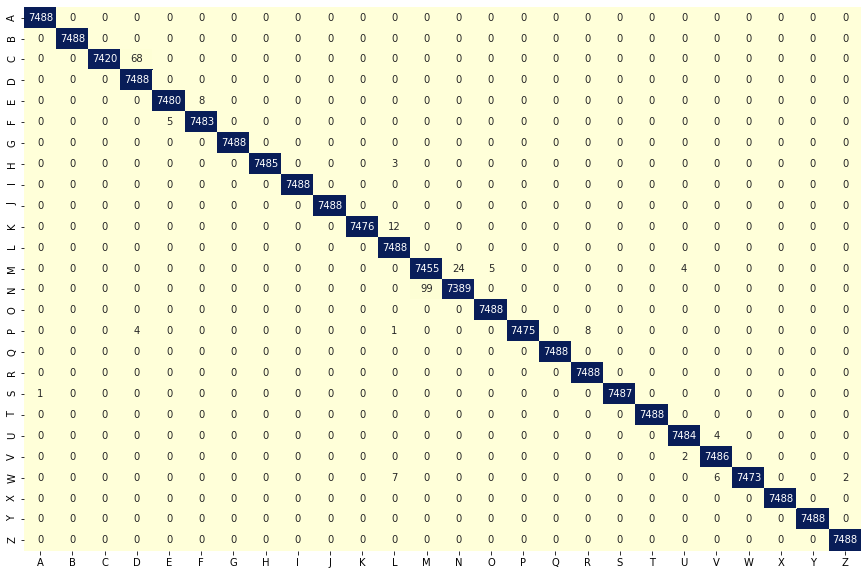

In [ ]:
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix

print("Confusion Matrix")
conf_matrix = confusion_matrix(y_test, yhat_classes)
df_cm = pd.DataFrame(conf_matrix,
                     index = [chr(alphabet) for alphabet in range(65,91)],
                     columns = [chr(alphabet) for alphabet in range(65,91)])
plt.figure(figsize = (15,10)) # ratio 3:2
sn.heatmap(df_cm, cmap="YlGnBu", fmt="d", cbar=False, annot=True)

In [ ]:
end_time = datetime.now(timeJKT).replace(microsecond=0)
model.save('myModel.h5')

convert_tflite = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = convert_tflite.convert()
open("Model_Code.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpxqbxbwdh/assets


3769860

In [ ]:
import shutil

# shutil.make_archive("Datasets", 'zip', "./Data")
# shutil.make_archive("New Data", 'zip', "./NewData")
# shutil.make_archive("Test Data", 'zip', "./NewData/test")
# shutil.make_archive("Augmentation Train", 'zip', "./train generator")
# shutil.make_archive("Augmentation Val", 'zip', "./val generator")

In [ ]:
run_time = end_time - start_time

print("Execution start at",start_time.strftime('%H:%M:%S'))
print("Execution ended at",end_time.strftime('%H:%M:%S'))
print("\nExecution Time:",run_time)

print("Augmentation Time:",augmentation_end - start_time)

Execution start at 21:17:11
Execution ended at 00:57:19

Execution Time: 3:40:08
Augmentation Time: 2:17:10


# Testing Section

In [ ]:
from keras.models import load_model

model = load_model('myModel.h5')

In [ ]:
def testing(image_for_test):
  size_img = 64,64
  
  image_for_test = cv2.resize(image_for_test, size_img)
  arr_img = image.img_to_array(image_for_test)
  arr_img = np.expand_dims(arr_img, axis=0)
  pred_images = np.vstack([arr_img])
  classes = model.predict(pred_images)
  classes = np.argmax(classes)
  return classes

## Test Image Data

./Data/H/H_augmented_0029039.jpg
./Data/S/S_augmented_0058488.jpg
./Data/Q/Q_augmented_0004563.jpg
./Data/C/C_augmented_0057984.jpg
./Data/B/B_augmented_0047045.jpg
./Data/H/H_augmented_0051689.jpg
./Data/K/K_augmented_0073675.jpg
./Data/R/R_augmented_0043284.jpg
./Data/G/G_augmented_0031863.jpg
./Data/O/O_augmented_0060249.jpg


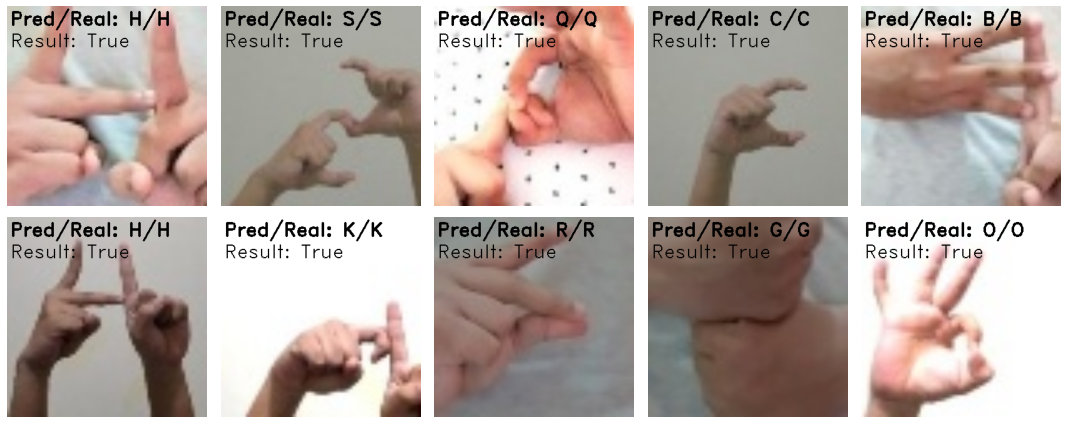

In [ ]:
fig = plt.figure(figsize=(15,6)) #ratio 5:2
size_img = 320,320

for pick_random in range(1,11):
  testdata = np.random.randint(0,len(test_images)-1)
  test_image = test_images[testdata]
  fig.add_subplot(2, 5, pick_random)

  output_image = testing(test_image)
  output_label = np.argmax(test_labels[testdata])
  output_result = int(output_image) is int(output_label)

  test_image = cv2.resize(test_image, size_img)
  cv2.putText(test_image,'Pred/Real: %s/%s'%(chr(output_image+65),chr(output_label+65)),(5,30),cv2.FONT_HERSHEY_DUPLEX, 1,(0,0,0),2)
  cv2.putText(test_image,'Result: %s'%output_result,(5,65), cv2.FONT_HERSHEY_DUPLEX, 1,(0,0,0),1)

  print("%s/%s"%(base_dir, dir_images[testdata]))
  plt.axis('off')
  fig.tight_layout()
  plt.imshow(test_image)

In [ ]:
# imgupload = files.upload()
# keys = list(imgupload.keys())
# size_img = 320,320

# imgupload = cv2.imread(keys[0])
# imgupload = cv2.cvtColor(imgupload, cv2.COLOR_BGR2RGB)
# imgupload = cv2.resize(imgupload, size_img)
# imgupload = imgupload.astype('float32')/255.0

# pred_result = testing(imgupload)
# pred_result = chr(pred_result+65)

# cv2.putText(imgupload,'Letter: %s'%pred_result,(20,40), cv2.FONT_HERSHEY_DUPLEX, 1,(0,0.59,0),2)

# plt.axis('off')
# # plt.title("Prediksi: " + "Huruf " +pred_result)
# plt.imshow(imgupload)
# plt.show()

## Test Video Data

In [ ]:
os.mkdir('./temp/')

Saving [New] A-Z Sequence Original 2.mp4 to [New] A-Z Sequence Original 2.mp4

All (26) frames from "[New] A-Z Sequence Original 2.mp4"


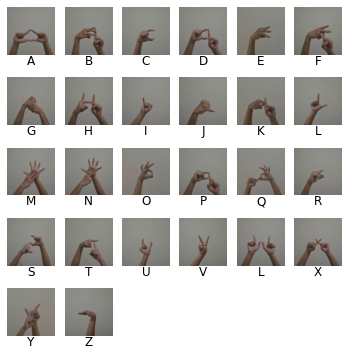

In [ ]:
vidupload = files.upload()
keys = list(vidupload.keys())
vidcap = cv2.VideoCapture(keys[0])
vidframes = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))

size_img = 320,320
images_for_plot = []
labels_for_plot = []

for i in range(0, vidframes):
  success, temp_image = vidcap.read()
  load_img_final = cv2.resize(temp_image, size_img)
  load_img_final = cv2.cvtColor(load_img_final, cv2.COLOR_BGR2RGB)
  load_img_final = load_img_final.astype('float32')/255.0
  images_for_plot.append(load_img_final)

  pred_result = testing(load_img_final)
  labels_for_plot.append(chr(pred_result+65))

  cv2.putText(temp_image,'Letter: %s'%chr(pred_result+65),(20,40), cv2.FONT_HERSHEY_DUPLEX, 1,(0,150,0),2)
  cv2.imwrite(os.path.join("./temp/frame%07d.jpg" % i), temp_image)

count = 1
col = 6
row = math.ceil(vidframes/col)
fig = plt.figure(figsize=(col,row*1.25))

if vidframes < 3600: # 60 seconds
  for show_img in images_for_plot:
    fig.add_subplot(row, col, count)
    plt.axis('off')
    plt.title(labels_for_plot[count-1], y=-0.33)
    plt.imshow(show_img)
    count+=1

  print("\n=============================================")
  print('All (%d) frames from "%s"' % (vidframes, keys[0]))
plt.show()

In [ ]:
import cv2
import os

image_folder = './temp'
video_name = '%s (with label).mp4'%str(keys[0])[0:len(keys[0])-4]

list_images = [loaded_img for loaded_img in sorted(os.listdir(image_folder))]
list_frames = cv2.imread(os.path.join(image_folder, list_images[0]))
height, width, layers = list_frames.shape

video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'MP4V'), 30, (width,height))

for to_video in list_images:
    video.write(cv2.imread(os.path.join(image_folder, to_video)))

print('Video saved as "%s"'%video_name)
cv2.destroyAllWindows()
video.release()

Video saved as "[New] A-Z Sequence Original 2 (with label).mp4"


In [ ]:
!rm -rf './temp'